# Homicide distribution according to relationship in USA

In [106]:
import os
from os import listdir
from os.path import isfile, join
import glob
import string
import operator
import csv
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [107]:
homedir = os.path.expanduser("~")
path_to_data = homedir+"\\Final\\Data"
print(path_to_data)

C:\Users\priya\Final\Data


In [108]:
for subdir,dirs, files in os.walk(path_to_data):
    #print(files)
    for file in files:
        if file == 'database.csv':
            #print(file)
            csv_data1=pd.read_csv(os.path.join(subdir,file))
csv_data1.head(5)

C:\Users\priya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [109]:
Victim_Sex = csv_data1['Victim Sex'].values
Victim_Age = csv_data1['Victim Age'].values
#Victim_Age = Victim_Age.astype('int16')
Perpetrator_Sex = csv_data1['Perpetrator Sex'].values
Perpetrator_Age = csv_data1['Perpetrator Age'].values
#Perpetrator_Age = Perpetrator_Age.astype('int16')
Relationship = csv_data1['Relationship'].values
Weapon = csv_data1['Weapon'].values
Solved = csv_data1['Crime Solved'].values
V_Race = csv_data1['Victim Race'].values
P_Race = csv_data1['Perpetrator Race'].values
Crime_Type = csv_data1['Crime Type'].values
Agency_Name = csv_data1['Agency Name'].values
Agency_Type = csv_data1['Agency Type'].values
P_Count =  csv_data1['Perpetrator Count'].values
City =  csv_data1['City'].values
State =  csv_data1['State'].values
Year =  csv_data1['Year'].values
Month =  csv_data1['Month'].values
Rel_Category = csv_data1['Relationship'].values
W_Category = csv_data1['Weapon'].values

homicide = pd.DataFrame(np.column_stack((Victim_Sex,Victim_Age,Perpetrator_Sex,Perpetrator_Age,
                    Relationship,Weapon,Solved,V_Race,P_Race,Crime_Type,Agency_Name,Agency_Type,
                    Rel_Category,P_Count,City,State,Year,Month,W_Category)))
homicide.columns = ['Victim_Sex','Victim_Age','Perpetrator_Sex','Perpetrator_Age','Relationship',
                    'Weapon','Solved','V_Race','P_Race','Crime_Type','Agency_Name','Agency_Type',
                    'Rel_Category','P_Count','City','State','Year','Month','W_Category']


In [115]:
homicide.loc[(homicide['Relationship'] == 'Wife') | (homicide['Relationship'] == 'Ex-Wife') |
             (homicide['Relationship'] == 'Girlfriend') |
             (homicide['Relationship'] == 'Common-Law Wife'), 'Rel_Category'] = 'Partner-Female'

homicide.loc[(homicide['Relationship'] == 'Husband') | (homicide['Relationship'] == 'Ex-Husband') |
             (homicide['Relationship'] == 'Boyfriend') | 
             (homicide['Relationship'] == 'Common-Law Husband'), 'Rel_Category'] = 'Partner-Male'

homicide.loc[(homicide['Relationship'] == 'Father') | (homicide['Relationship'] == 'In-Law') |
             (homicide['Relationship'] == 'Mother') | (homicide['Relationship'] == 'Stepfather') |
             (homicide['Relationship'] == 'Stepmother'), 'Rel_Category'] = 'Parent'

homicide.loc[(homicide['Relationship'] == 'Daughter') | (homicide['Relationship'] == 'Son') |
             (homicide['Relationship'] == 'Stepdaughter') | 
             (homicide['Relationship'] == 'Stepson'), 'Rel_Category'] = 'Children'

homicide.loc[(homicide['Relationship'] == 'Brother') | (homicide['Relationship'] == 'Sister'),
             'Rel_Category'] = 'Sibling'

homicide.loc[(homicide['Relationship'] == 'Employee') | (homicide['Relationship'] == 'Employer') ,
             'Rel_Category'] = 'Work'


homicide.loc[(homicide['Relationship'] == 'Acquaintance'),
             'Rel_Category'] = 'Acquaintance'

homicide.loc[(homicide['Relationship'] == 'Friend'),
             'Rel_Category'] = 'Friend'

homicide.loc[(homicide['Relationship'] == 'Family'),
             'Rel_Category'] = 'Family'

homicide.loc[(homicide['Relationship'] == 'Neighbor'),
             'Rel_Category'] = 'Neighbor'


homicide.loc[(homicide['Relationship'] == 'Unknown'),
             'Rel_Category'] = 'Stranger'

homicide.loc[(homicide['Relationship'] == 'Boyfriend/Girlfriend') & (homicide.Victim_Sex == 'Female'),
             'Rel_Category'] = 'Partner-Female'

homicide.loc[(homicide['Relationship'] == 'Boyfriend/Girlfriend') & ((homicide.Victim_Sex == 'Male') |
            (homicide.Victim_Sex == 'Unknown')) , 'Rel_Category'] = 'Partner-Male'

homicide.head(2)

,Victim_Sex,Victim_Age,Perpetrator_Sex,Perpetrator_Age,Relationship,Weapon,Solved,V_Race,P_Race,Crime_Type,Agency_Name,Agency_Type,Rel_Category,P_Count,City,State,Year,Month,W_Category
0,Male,14,Male,15,Acquaintance,Blunt Object,Yes,Native American/Alaska Native,Native American/Alaska Native,Murder or Manslaughter,Anchorage,Municipal Police,Acquaintance,0,Anchorage,Alaska,1980,January,Blunt Object
1,Male,43,Male,42,Acquaintance,Strangulation,Yes,White,White,Murder or Manslaughter,Anchorage,Municipal Police,Acquaintance,0,Anchorage,Alaska,1980,March,Strangulation


In [118]:
Main_df = homicide[(homicide.State != "Unknown")].groupby(['Rel_Category']).size().order(ascending=False).to_frame(name = 'number of incidents').reset_index()
Main_df.head(2)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,Rel_Category,number of incidents
0,Stranger,369606
1,Acquaintance,126018


In [119]:
Main_df['Total incidents'] = 638454
Main_df['Percentage'] = (Main_df['number of incidents']/Main_df['Total incidents']) * 100
Main_df.head(20)

,Rel_Category,number of incidents,Total incidents,Percentage
0,Stranger,369606,638454,57.890780
1,Acquaintance,126018,638454,19.737992
2,Partner-Female,44299,638454,6.938480
3,Friend,21945,638454,3.437209
4,Partner-Male,19874,638454,3.112832
5,Children,19367,638454,3.033421
6,Parent,13817,638454,2.164134
7,Family,9535,638454,1.493451
8,Sibling,6806,638454,1.066013
9,Neighbor,6294,638454,0.985819


C:\Users\priya\Anaconda3\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	lower left
	center
	center left
	best
	center right
	upper center
	right
	upper left
	lower right
	lower center
	upper right

  six.iterkeys(self.codes))))


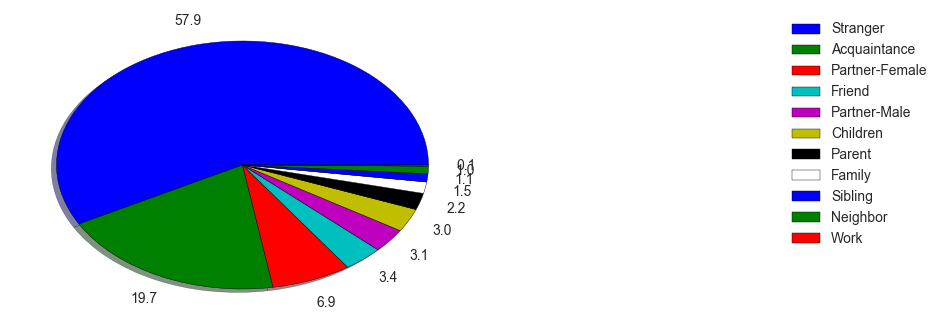

In [124]:
labels=Main_df['Rel_Category']
values =  Main_df['Percentage']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
pie = plt.pie(values, shadow=True, autopct='%1.1f', pctdistance = 1.2, labeldistance = 1.1)
plt.legend(pie[0], labels, loc="upper corner", bbox_to_anchor = (2,1))

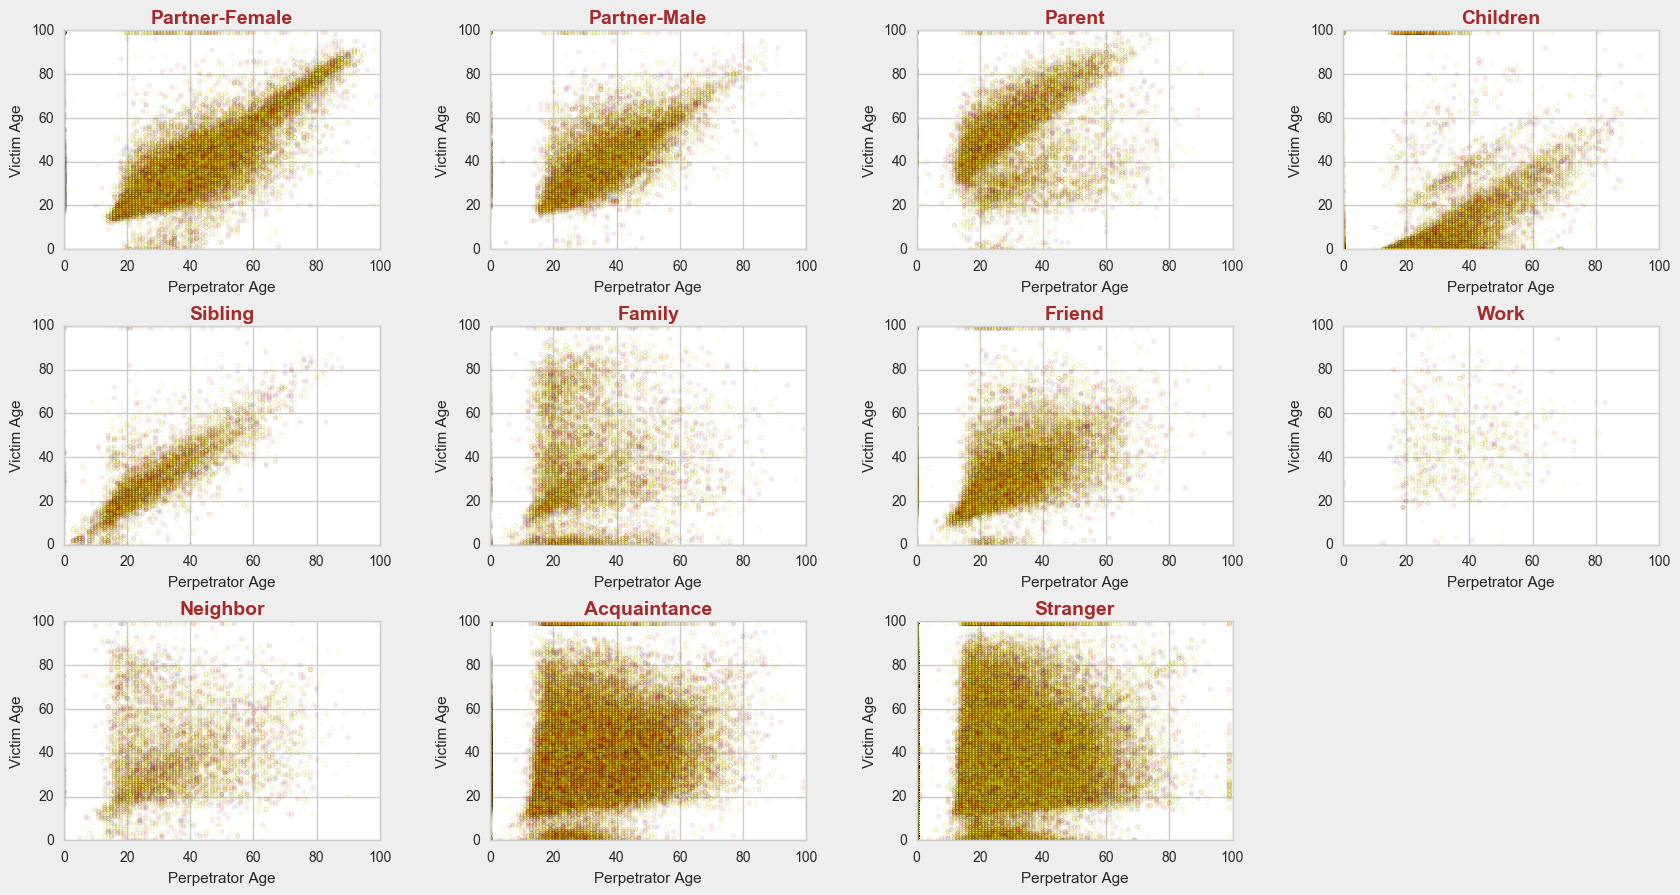

In [132]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,9),facecolor='#eeeeee')
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.35,wspace=.35)
homicide = homicide[(homicide.Victim_Age != ' ') & (homicide.Perpetrator_Age != ' ')]

R = ['Partner-Female', 'Partner-Male', 'Parent', 'Children', 'Sibling','Family','Friend','Work','Neighbor','Acquaintance','Stranger']

W = ['Handgun', 'Firearm', 'Shotgun', 'Rifle', 'Gun','Knife','Blunt Object','Unknown','Strangulation','Suffocation','Fire','Explosives','Drugs','Poison','Drowning','Fall']
homicide.loc[(homicide['Weapon'] == 'Handgun') | (homicide['Weapon'] == 'Firearm') |
             (homicide['Weapon'] == 'Shotgun') | (homicide['Weapon'] == 'Rifle')   |
             (homicide['Weapon'] == 'Gun'), 'W_Category'] = 'yellow'
homicide.loc[(homicide['Weapon'] == 'Strangulation') | (homicide['Weapon'] == 'Suffocation') , 'W_Category'] = 'steelblue'
homicide.loc[(homicide['Weapon'] == 'Drowning') | (homicide['Weapon'] == 'Fall') , 'W_Category'] = 'olive'
homicide.loc[(homicide['Weapon'] == 'Fire') | (homicide['Weapon'] == 'Explosives') , 'W_Category'] = 'palegreen'
homicide.loc[(homicide['Weapon'] == 'Drugs') | (homicide['Weapon'] == 'Poison') , 'W_Category'] = 'mediumblue'
homicide.loc[(homicide['Weapon'] == 'Knife') , 'W_Category'] = 'red'
homicide.loc[(homicide['Weapon'] == 'Blunt Object') , 'W_Category'] = 'purple'
homicide.loc[(homicide['Weapon'] == 'Unknown') , 'W_Category'] = 'silver'

for i in range(11):
    plt.subplot(3, 4, i+1)
    plt.title(R[i],fontsize=14,fontweight='bold',color='brown')
    plt.ylim([0,100])
    plt.xlim([0,100])
    plt.scatter(homicide[homicide.Rel_Category == R[i]].Perpetrator_Age.astype(int),homicide[homicide.Rel_Category == R[i]].Victim_Age.astype(int), marker='o',s=10, c=homicide.W_Category, alpha=0.08)
    plt.ylabel('Victim Age')
    plt.xlabel('Perpetrator Age')
    
plt.show()